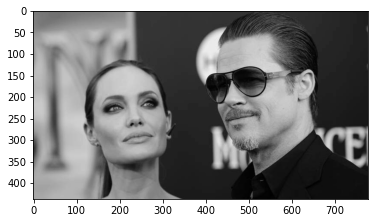

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle

TRAINDATADIR = "train"
TESTDATADIR = "test"
CELEBS = ["Angelina Jolie", "Arnold Schwarzenegger", "Beyonce Knowles", "Chris Rock", "George Clooney"]
IMG_SIZE = 100    #image will be 100x100

#viewing image to verify that its loaded correctly
for cel in CELEBS:
    path = os.path.join(TRAINDATADIR, cel)
    count = 0
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [9]:
#Appends labels to images and also resizes to IMG_SIZExIMG_SIZE
train_data = []
def create_train_data():
    for cel in CELEBS:
        path = os.path.join(TRAINDATADIR, cel)
        class_num = CELEBS.index(cel)
        for img in os.listdir(path):
            #some images will fail so ignore them
            try:
                #Create array from image data then resize and append to list
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                sized_img = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                train_data.append([sized_img, class_num])
            except Exception as e:
                pass

create_train_data()


In [10]:
test_data = []
def create_test_data():
    for cel in CELEBS:
        path = os.path.join(TESTDATADIR, cel)
        class_num = CELEBS.index(cel)
        for img in os.listdir(path):
            #some images will fail so ignore them
            try:
                #Create array from image data then resize and append to list
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                sized_img = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                test_data.append([sized_img, class_num])
            except Exception as e:
                pass

create_test_data()

In [11]:
print(len(train_data))
print(len(test_data))


3481
348


In [12]:
#shuffle data around for better training
random.shuffle(train_data)
random.shuffle(test_data)

In [13]:
XTrain = []
YTrain = []
XTest = []
YTest = []
#Creates NP array with same data
for img, label in train_data:
    XTrain.append(img)
    YTrain.append(label)

for img,label in test_data:
    XTest.append(img)
    YTest.append(label)
    
XTrain = np.array(XTrain).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
YTrain = np.array(YTrain)

XTest = np.array(XTest).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
YTest = np.array(YTest)


In [15]:
#writes data sets out to seperate files
data_out = open("XTrain.pickle", "wb")
pickle.dump(XTrain, data_out)
data_out.close()

data_out = open("YTrain.pickle", "wb")
pickle.dump(YTrain, data_out)
data_out.close()

data_out = open("XTest.pickle", "wb")
pickle.dump(XTest, data_out)
data_out.close()

data_out = open("YTest.pickle", "wb")
pickle.dump(YTest, data_out)
data_out.close()